In [2]:
# importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')

# List of activities
activities = ['Walking', 'Clapping', 'Drinking', 'Eating', 'Pouring', 'Sitting']

# Initialize an empty DataFrame
all_data_test = pd.DataFrame()
all_data_train = pd.DataFrame()

# Loop through each activity
for activity in activities:
    # Read the activity's data
    df_test = pd.read_csv(f'{activity}_test.csv')
    df_train = pd.read_csv(f'{activity}_train.csv')

    # Add an 'activity' column
    df_test['activity'] = activity
    df_train['activity'] = activity
    
    # Append the data to the main DataFrame
    all_data_test = pd.concat([all_data_test, df_test], ignore_index=True)
    all_data_train = pd.concat([all_data_train, df_train], ignore_index=True)

# Save the combined data to a new CSV file
# all_data_test.to_csv('all_data_test.csv', index=False)
# all_data_train.to_csv('all_data_train.csv', index=False)
print(all_data_test.head())
print(all_data_train.head())

# Now we have a single DataFrame with all the data
har_df = all_data_train
har_df_test = all_data_test

   timestamp        ax        ay        az         gx         gy         gz  \
0     171812 -0.791504  0.514648  0.280640  23.925781  -3.662109 -16.113281   
1     171838 -0.785400  0.535278  0.288208  15.258789  -0.610352  -8.911133   
2     171865 -0.774902  0.541138  0.270508   4.028320  -8.972168  -2.319336   
3     171891 -0.805542  0.547241  0.299194   0.793457  -9.033203  -0.488281   
4     171917 -0.800781  0.529053  0.301392   2.929688 -12.145996   7.812500   

  activity  
0  Walking  
1  Walking  
2  Walking  
3  Walking  
4  Walking  
   timestamp        ax        ay        az         gx         gy         gz  \
0      31719 -0.851318  0.556885  0.233887 -15.625000 -23.437500 -17.578125   
1      31745 -0.725342  0.537109  0.182495  -6.164551 -28.076172  15.869141   
2      31771 -0.661255  0.557861  0.200439   0.732422 -18.981934  53.161621   
3      31798 -0.764893  0.565674  0.237671  -9.765625 -23.376465  78.125000   
4      31824 -0.928955  0.582886  0.210083 -35.58349

In [3]:
har_df

,timestamp,ax,ay,az,gx,gy,gz,activity
0,31719,-0.851318,0.556885,0.233887,-15.625000,-23.437500,-17.578125,Walking
1,31745,-0.725342,0.537109,0.182495,-6.164551,-28.076172,15.869141,Walking
2,31771,-0.661255,0.557861,0.200439,0.732422,-18.981934,53.161621,Walking
3,31798,-0.764893,0.565674,0.237671,-9.765625,-23.376465,78.125000,Walking
4,31824,-0.928955,0.582886,0.210083,-35.583496,-23.437500,94.848633,Walking
...,...,...,...,...,...,...,...,...
27461,1117465,-0.204346,0.499634,0.821655,1.647949,-4.638672,1.831055,Sitting
27462,1117492,-0.197388,0.511841,0.839478,4.455566,-6.958008,3.662109,Sitting
27463,1117518,-0.191772,0.525635,0.831421,6.347656,-7.019043,3.784180,Sitting
27464,1117544,-0.207886,0.536133,0.804810,4.516602,-4.882812,4.455566,Sitting


In [4]:
# removing null values (if any) from both the dataframes
har_df = har_df.dropna()
har_df_test = har_df_test.dropna()
cols = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']

for col in cols :
    har_df[col] = pd.to_numeric(har_df[col], errors='coerce')
    har_df_test[col] = pd.to_numeric(har_df_test[col], errors='coerce')
har_df = har_df.dropna()
har_df_test = har_df_test.dropna()

# drop the rows where timestamp is 0
df = har_df[har_df['timestamp'] != 0]
df_test = har_df_test[har_df_test['timestamp'] != 0]

# now arrange data in ascending order of the timestamp
df = df.sort_values(by = ['timestamp'], ignore_index=True)
df_test = df_test.sort_values(by = ['timestamp'], ignore_index=True)

In [5]:
df.head()

,timestamp,ax,ay,az,gx,gy,gz,activity
0,31719,-0.851318,0.556885,0.233887,-15.625000,-23.437500,-17.578125,Walking
1,31745,-0.725342,0.537109,0.182495,-6.164551,-28.076172,15.869141,Walking
2,31771,-0.661255,0.557861,0.200439,0.732422,-18.981934,53.161621,Walking
3,31798,-0.764893,0.565674,0.237671,-9.765625,-23.376465,78.125000,Walking
4,31824,-0.928955,0.582886,0.210083,-35.583496,-23.437500,94.848633,Walking


As you can see, we are left with 1085360 rows.

Exploratory Data Analysis
Analyzing class label distribution —

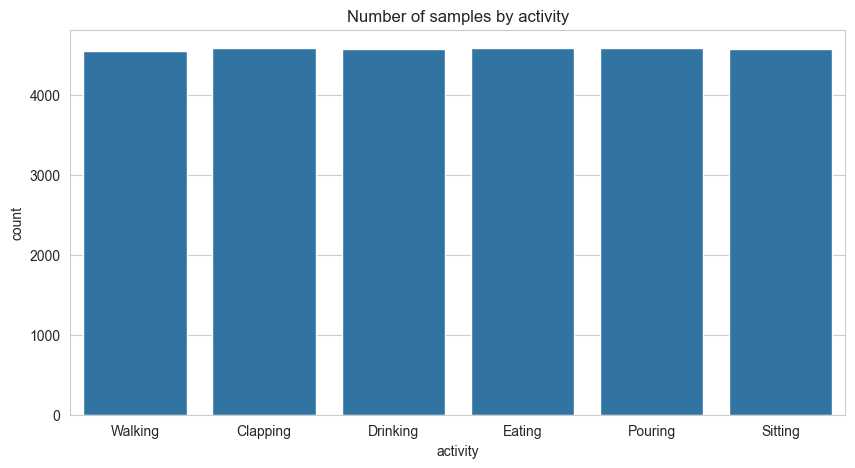

In [6]:
sns.set_style("whitegrid")
plt.figure(figsize = (10, 5))
sns.countplot(x = 'activity', data = df)
plt.title('Number of samples by activity')
plt.show()

As you can see there is a significant class imbalance here with majority of the samples having class-label ‘Walking’ and ‘Jogging’. ‘Standing and ‘Sitting’ activities have least representation in the dataset.

Now let’see how the users are contributing to each activity. This will help us in deciding how to split the data for training and testing.

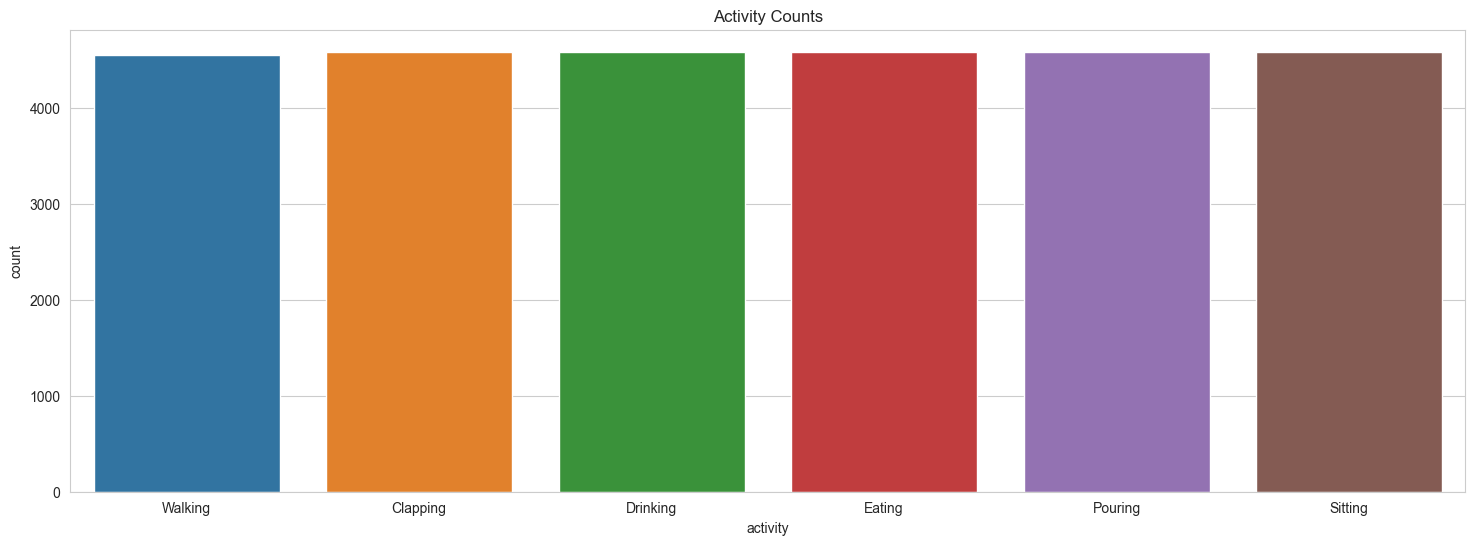

In [7]:
plt.figure(figsize = (18, 6))
sns.countplot(x = 'activity', hue= 'activity', data = df)
plt.title('Activity Counts')
plt.show()

As it can be seen, not all the users are performing all the activities. The time for which they perform each activity also varies. Regardless, this won’t be affecting our subsequent analysis as we have sufficiently large number of data samples and we are assuming all the users are alike.

For a particular user, lets observe how the signal values in each of the x, y and z dimension varies with time.

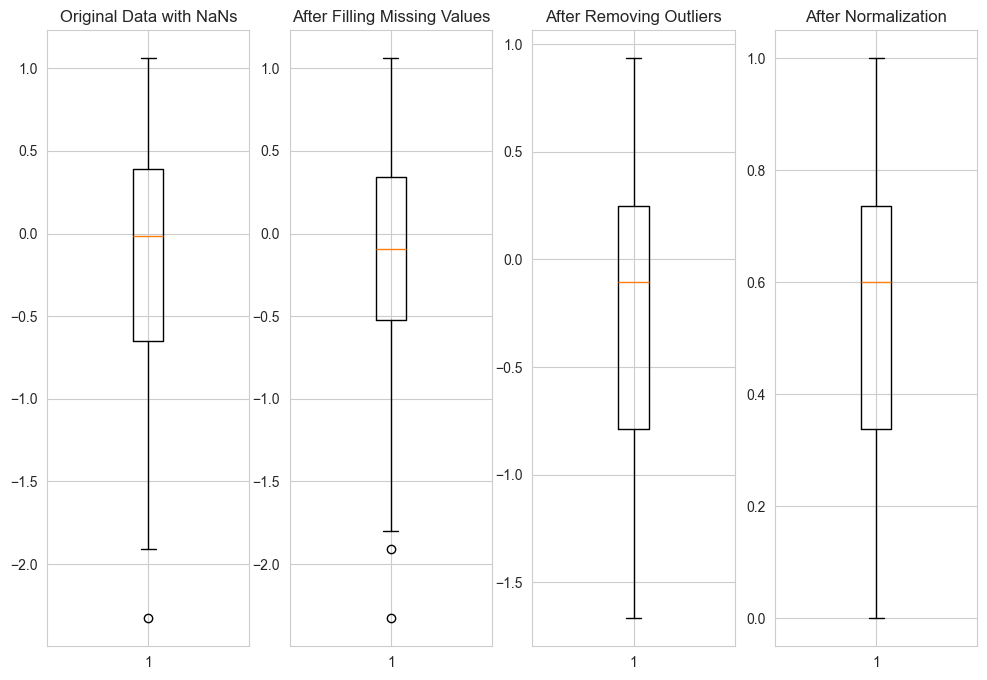

In [8]:
# Intentionally insert missing values
np.random.seed(0)  # for reproducibility
df_with_nan = df.copy()
mask = np.random.choice([True, False], size=df.shape, p=[.1, .9])  # 10% NaNs
df_with_nan[mask] = np.nan

# Convert the data to numeric, if possible
df_with_nan = df_with_nan.apply(pd.to_numeric, errors='ignore')

# Fill in missing values in numeric columns with the mean
numeric_cols = df_with_nan.select_dtypes(include=np.number).columns
df_no_missing = df_with_nan.copy()
df_no_missing[numeric_cols] = df_with_nan[numeric_cols].fillna(df_with_nan[numeric_cols].mean())

# Fill in missing values in non-numeric columns with the most frequent value
for col in df_with_nan.select_dtypes(exclude=np.number).columns:
    df_no_missing[col].fillna(df_with_nan[col].mode()[0], inplace=True)

# Remove outliers
numeric_cols = df_no_missing.select_dtypes(include=np.number).columns
Q1 = df_no_missing[numeric_cols].quantile(0.25)
Q3 = df_no_missing[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df_no_missing[~((df_no_missing[numeric_cols] < (Q1 - 1.5 * IQR)) | (df_no_missing[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Normalize the data
numeric_cols = df_no_outliers.select_dtypes(include=np.number).columns
df_normalized = df_no_outliers.copy()
df_normalized[numeric_cols] = (df_no_outliers[numeric_cols] - df_no_outliers[numeric_cols].min()) / (df_no_outliers[numeric_cols].max() - df_no_outliers[numeric_cols].min())

# Plot before cleaning
plt.figure(figsize=(12, 8))
plt.subplot(1, 4, 1)
plt.boxplot(df_with_nan['ax'].dropna())
plt.title('Original Data with NaNs')

# Plot after filling missing values
plt.subplot(1, 4, 2)
plt.boxplot(df_no_missing['ax'].dropna())
plt.title('After Filling Missing Values')

# Plot after removing outliers
plt.subplot(1, 4, 3)
plt.boxplot(df_no_outliers['ax'].dropna())
plt.title('After Removing Outliers')

# Plot after normalization
plt.subplot(1, 4, 4)
plt.boxplot(df_normalized['ax'].dropna())
plt.title('After Normalization')

plt.show()

Activity Walking: 1000 rows


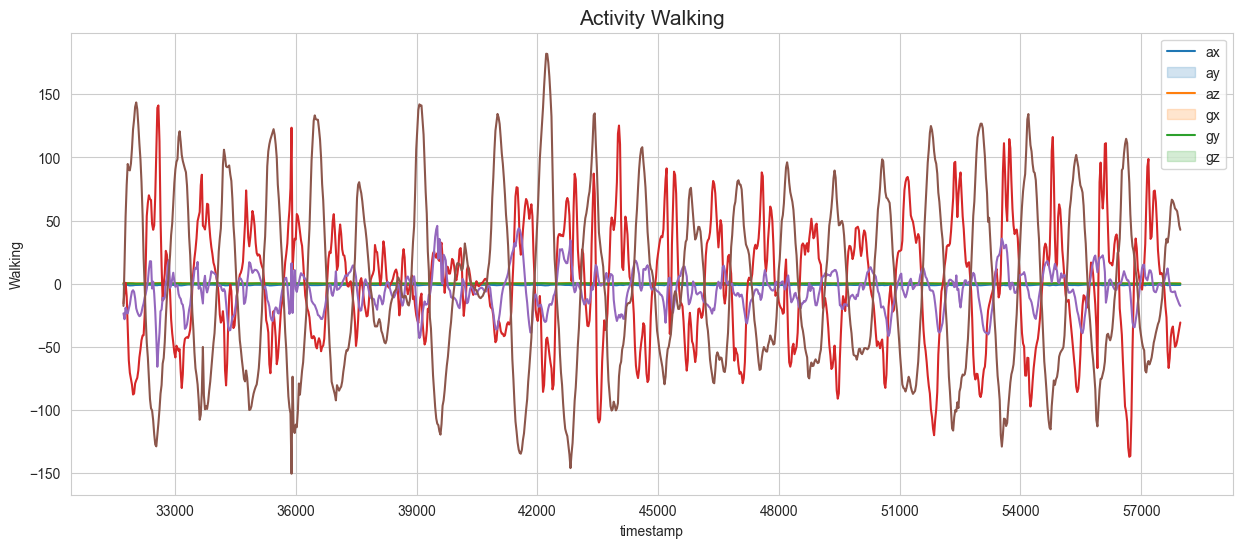

Activity Clapping: 1000 rows


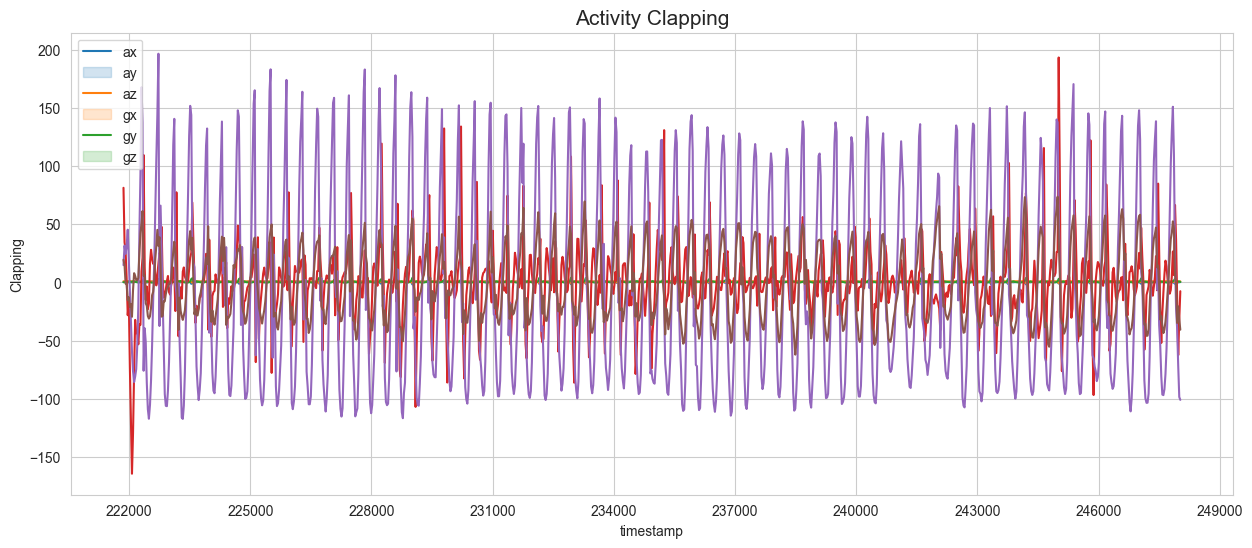

Activity Drinking: 1000 rows


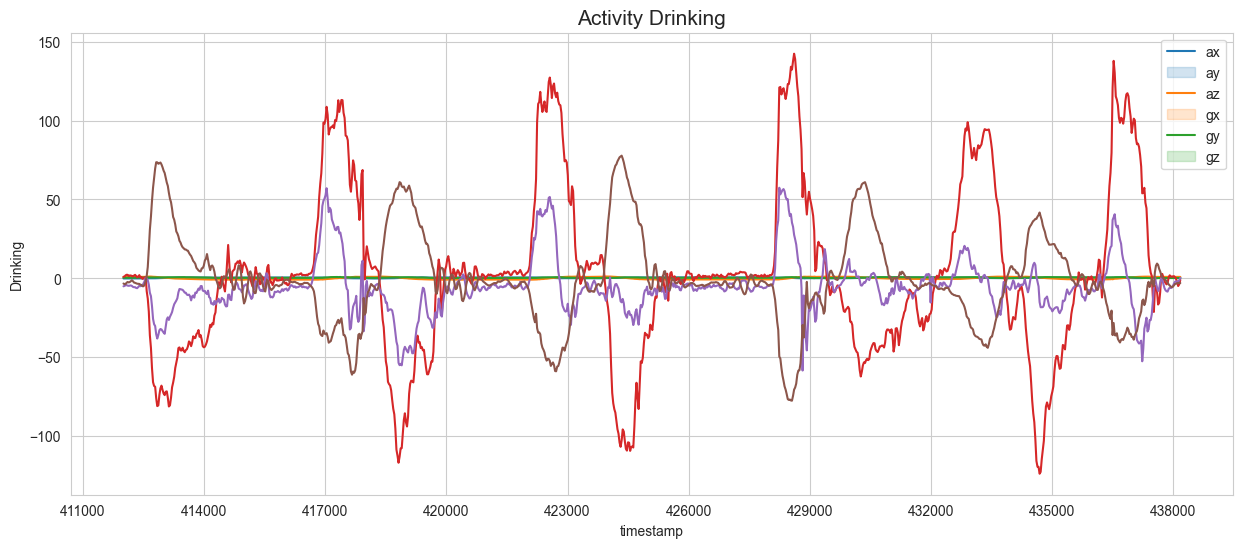

Activity Eating: 1000 rows


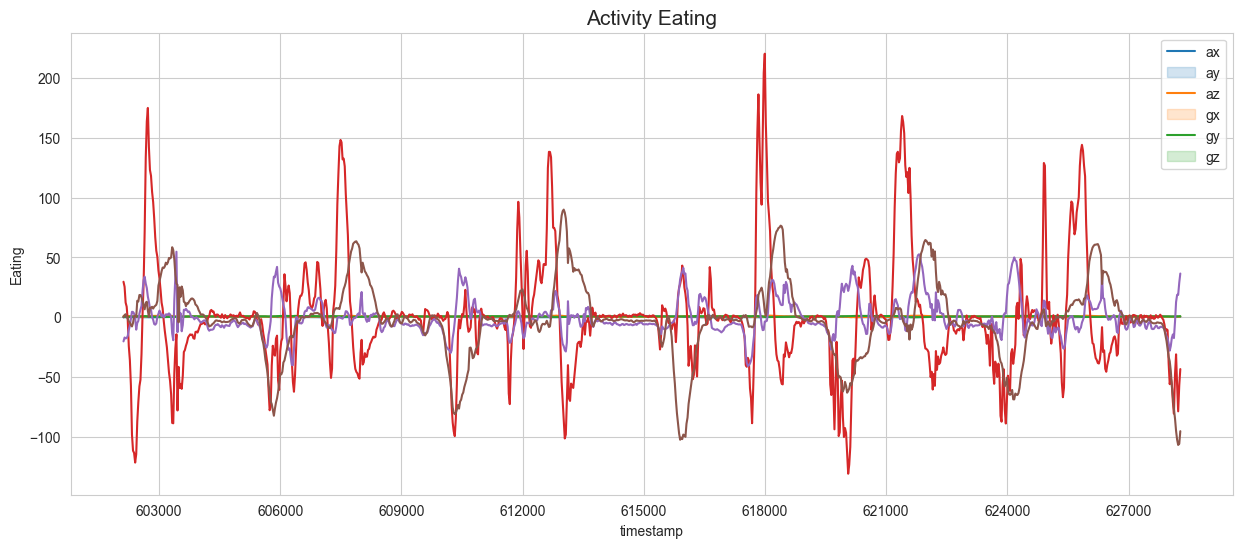

Activity Pouring: 1000 rows


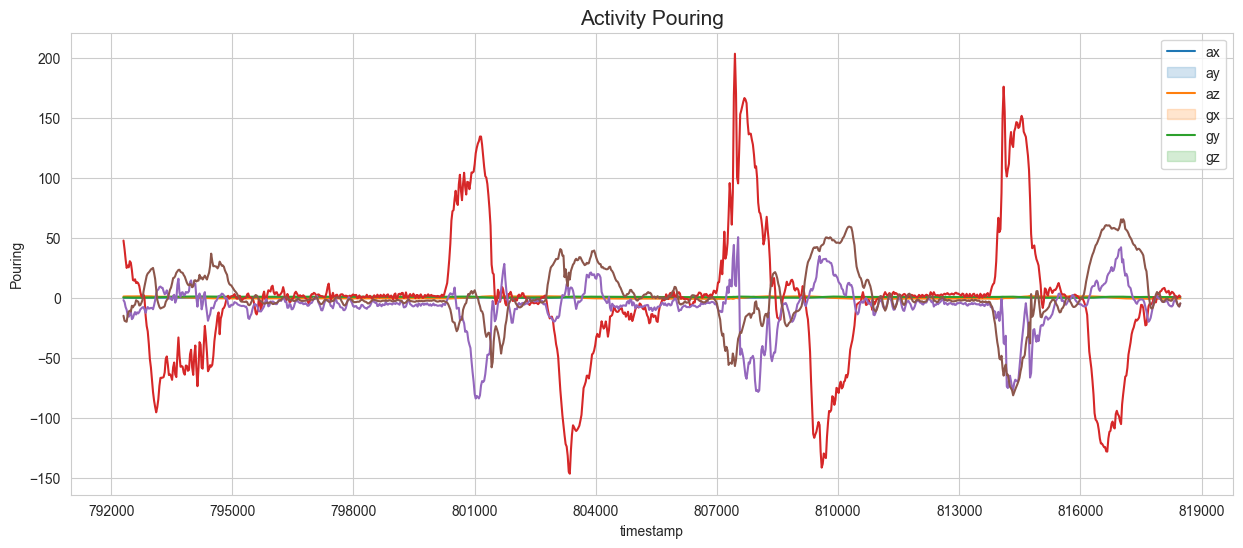

Activity Sitting: 1000 rows


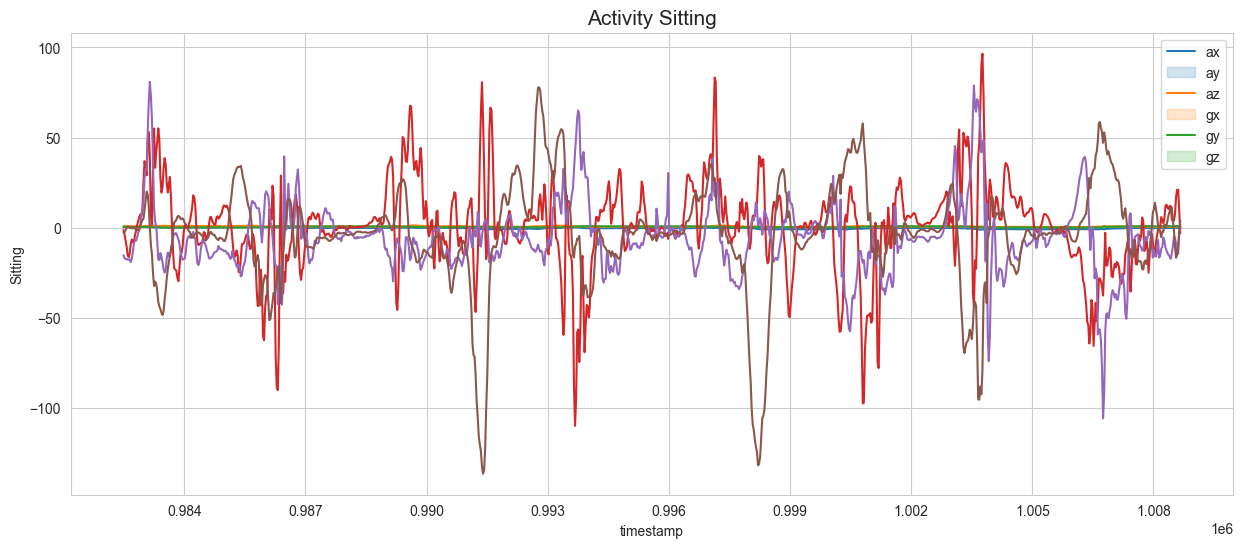

In [9]:
import matplotlib.ticker as ticker

for i in ['Walking', 'Clapping', 'Drinking', 'Eating', 'Pouring', 'Sitting']:
  # We plot only 1000 rows for each activity as the SR is 50 Hz
  # So, 1000 rows = 20 seconds of data for each activity
  data = df[(df['activity'] == i)][:1000]
  print(f'Activity {i}: {len(data)} rows')
  if len(data) > 0:
    fig, ax = plt.subplots(figsize=(15, 6))
    sns.lineplot(y = 'ax', x = 'timestamp', data = data, ax=ax)
    sns.lineplot(y = 'ay', x = 'timestamp', data = data, ax=ax)
    sns.lineplot(y = 'az', x = 'timestamp', data = data, ax=ax)
    sns.lineplot(y = 'gx', x = 'timestamp', data = data, ax=ax)
    sns.lineplot(y = 'gy', x = 'timestamp', data = data, ax=ax)
    sns.lineplot(y = 'gz', x = 'timestamp', data = data, ax=ax)
    ax.legend(['ax', 'ay', 'az', 'gx', 'gy', 'gz'])
    ax.set_ylabel(i)
    ax.set_title(f'Activity {i}', fontsize = 15)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))  # Limit number of x-axis ticks
    plt.show()

We have considered a subset of 400 samples for visualising the signal. This is equivalent to 20 secs of the activity (as the frequency of data collection was 20 Hz). As you can notice, the signals shows periodic behaviour for the activities like Walking, Jogging, Upstairs and Downstairs while it has very less movement for stagnant activities like Sitting and Standing.

Now let’s observe activity-wise distribution of the signal data along x, y and z axes to see if there is any obvious pattern based on the range and distribution of the values.

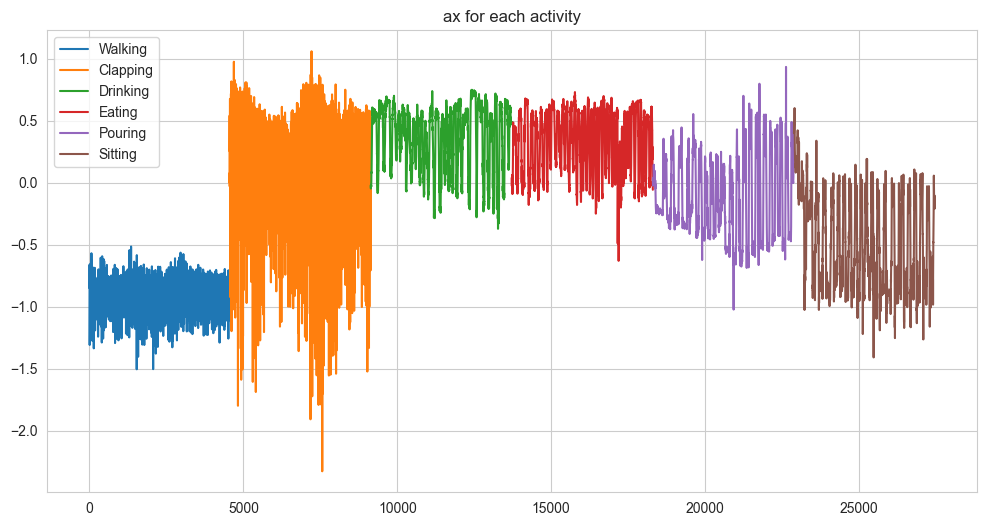

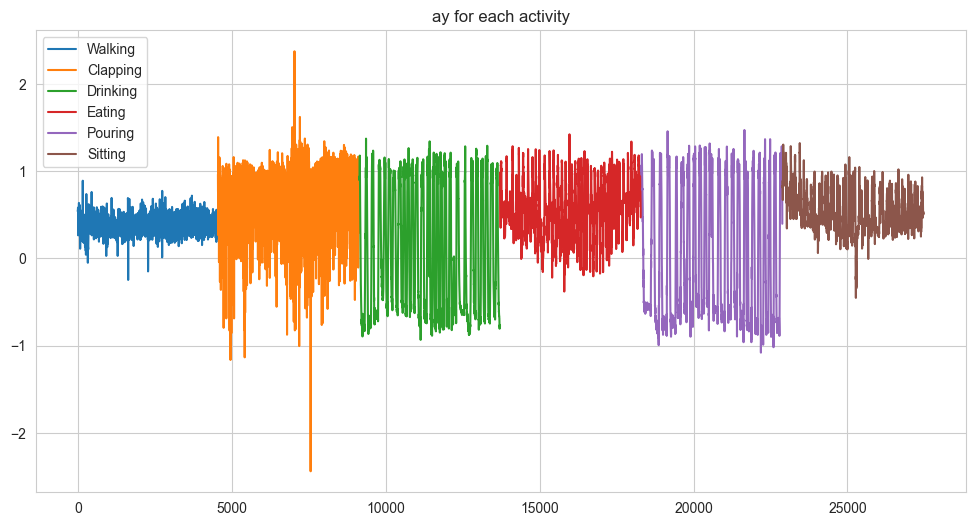

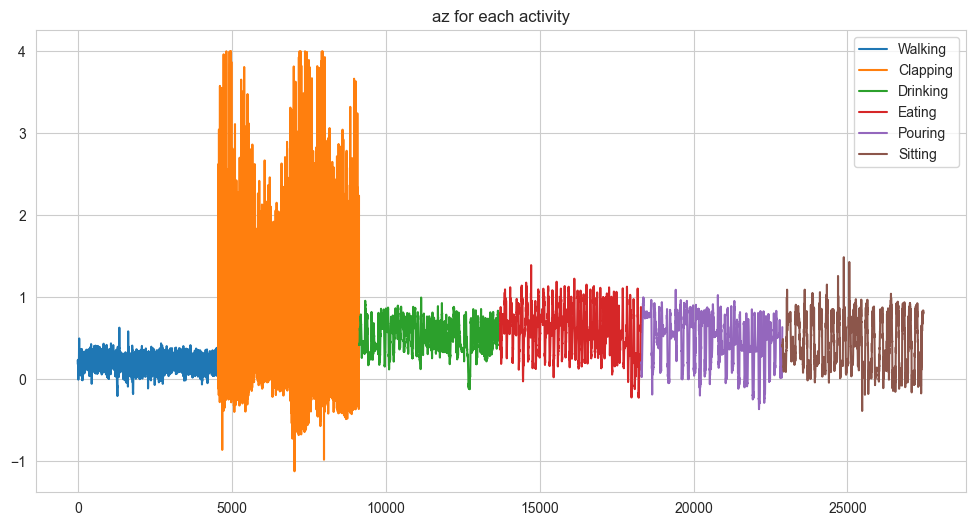

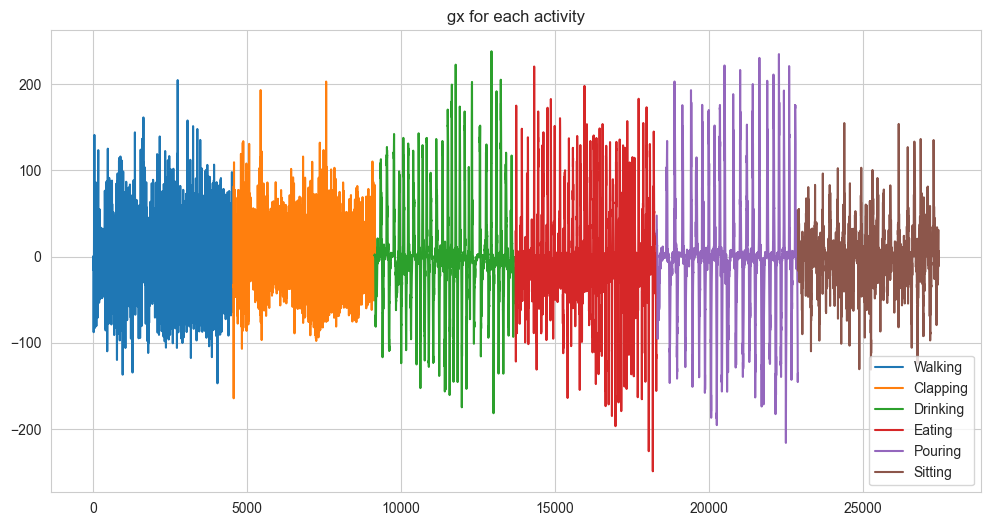

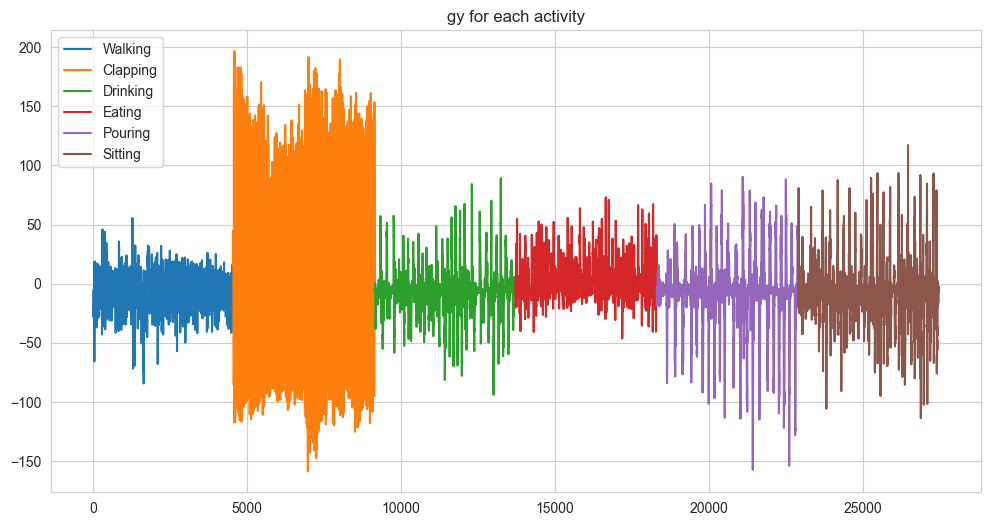

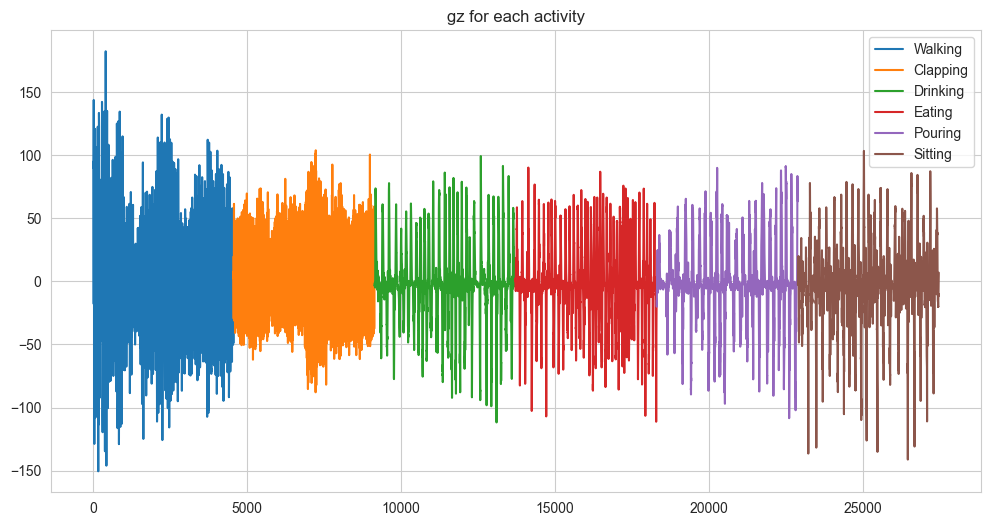

In [10]:
sensors = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']

for sensor in sensors:
    plt.figure(figsize=(12, 6))
    for activity in df['activity'].unique():
        activity_data = df[df['activity'] == activity]
        plt.plot(activity_data[sensor], label=activity)
    plt.title(f'{sensor} for each activity')
    plt.legend()
    plt.show()

It is observed that there is very high overlap in the data among activities like Upstairs, Downstairs, Walking, Jogging and Standing on all the axes. Sitting somewhat appears to have distinctive values along y-axis and z-axis.

This bring us to the heart of the topic, that is Data transformation and Feature engineering.

Data Transformation
Standard classification algorithms cannot be directly applied to the raw time-series data. Instead, we must first transform the raw time-series data using ‘windowing’ technique. In this technique, we divide the data into windows of 5 seconds, and then we generate new features by aggregating the 100 raw samples contained within each of these 5 second segments. For assigning class-label against the transformed features, we take the most frequent activity in that window.

In [11]:
print(df.isnull().sum())
print(df.duplicated().sum())

timestamp    0
ax           0
ay           0
az           0
gx           0
gy           0
gz           0
activity     0
dtype: int64
0


In [12]:
from sklearn.preprocessing import LabelEncoder

# Print the unique values in the 'activity' column before encoding
print("Before encoding:", df['activity'].unique())

# Creating a instance of label Encoder.
le = LabelEncoder()

# Fit and transform the 'activity' column of df
df['activity'] = le.fit_transform(df['activity'])
df_test['activity'] = le.fit_transform((df_test['activity']))

# Print the unique values in the 'activity' column after encoding
print("After encoding:", df['activity'].unique())

# Get the classes from the LabelEncoder
decoded_labels = ['Walking', 'Clapping', 'Drinking', 'Eating', 'Pouring', 'Sitting']
print("Decoded labels:", decoded_labels)

Before encoding: ['Walking' 'Clapping' 'Drinking' 'Eating' 'Pouring' 'Sitting']
After encoding: [5 0 1 2 3 4]
Decoded labels: ['Walking', 'Clapping', 'Drinking', 'Eating', 'Pouring', 'Sitting']


In [13]:
# Define window size and step size for creating overlapping windows
window_size = 100  # sampling rate of 20 Hz, a window size of 100 corresponds to 5 seconds
step_size = 50 

# Initialize a list to store the transformed features and labels
transformed_features = []
transformed_labels = []

# Loop over the DataFrame to create windows
for i in range(0, len(df) - window_size, step_size):
    # Get the window
    window = df.iloc[i: i + window_size]
    
    # Calculate aggregated features for the window
    aggregated_features = window[['ax', 'ay', 'az', 'gx', 'gy', 'gz']].agg(['mean', 'std', 'min', 'max'])

    # Flatten the aggregated features
    aggregated_features = aggregated_features.unstack()

    # Append the aggregated features to the list
    transformed_features.append(aggregated_features)

# Convert the lists to DataFrames
X = pd.DataFrame(transformed_features)
y = pd.DataFrame(transformed_labels, columns=['activity'])

In [14]:
# lable = cols[-1]
# plt.hist(df[df['activity'] == 0][lable], bins = 50, alpha = 0.5, label = 'Clapping', density=False)
# plt.hist(df[df['activity'] == 1][lable], bins = 50, alpha = 0.5, label = 'Drinking', density=False)
# plt.hist(df[df['activity'] == 2][lable], bins = 50, alpha = 0.5, label = 'Eating', density=False)
# plt.hist(df[df['activity'] == 3][lable], bins = 50, alpha = 0.5, label = 'Pouring', density=False)
# plt.hist(df[df['activity'] == 4][lable], bins = 50, alpha = 0.5, label = 'Sitting', density=False)
# plt.hist(df[df['activity'] == 5][lable], bins = 50, alpha = 0.5, label = 'Walking', density=False)

Before we start designing new features, we must first split the data into train and test. Typically we tend to do random splitting, but here in this specific scenario, splitting as per the User ID makes more sense.

So out of total 36 users, the data of first 27 users will form our train data while rest 9 users will be included in our test data.

Feature Engineering: Statistical measures
We will build a total of 18 simple statistical features —
1. mean
2. standard deviation
3. average absolute deviation
4. minimum value
5. maximum value
6. difference of maximum and minimum values
7. median
8. median absolute deviation
9. interquartile range
10. negative values count
11. positive values count
12. number of values above mean
13. number of peaks
14. skewness
15. kurtosis
16. energy
17. average resultant acceleration
18. signal magnitude area

Processing the Train Data

       ax_mean   ay_mean   az_mean    gx_mean    gy_mean    gz_mean    ax_std  \
0    -0.967865  0.423663  0.116980 -53.149414 -18.331909  88.604736  0.184069   
1    -0.877594  0.363043  0.064893  -8.740234  -8.767700  15.783691  0.093841   
2    -0.909857  0.464954  0.162567  53.796387 -14.001465 -82.446289  0.125104   
3    -0.900092  0.514276  0.252557  22.787476 -12.396240 -30.270386  0.146776   
4    -0.951239  0.495111  0.211572 -36.874390  -5.490112  66.677856  0.208747   
...        ...       ...       ...        ...        ...        ...       ...   
2740 -0.596863  0.702856  0.423260  -9.896851 -55.606079  45.715332  0.191765   
2741 -0.281378  0.776587  0.577411 -16.650391 -40.390015  25.759888  0.192229   
2742 -0.106500  0.725885  0.698346 -20.831299 -18.933105  -1.651001  0.118225   
2743 -0.120782  0.598199  0.774829 -11.141968  -7.031250 -16.107178  0.060880   
2744 -0.159509  0.548468  0.800153  -5.905151  -5.767822 -13.595581  0.025484   

        ay_std    az_std   

<Axes: xlabel='activity'>

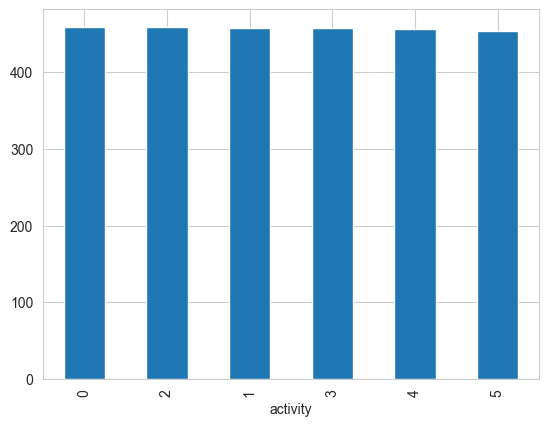

In [32]:
ax_list = []
ay_list = []
az_list = []
gx_list = []
gy_list = []
gz_list = []
train_labels = []

window_size = 20
step_size = 10

# creating overlaping windows of size window-size 20 and step-size 10
for i in range(0, df.shape[0] - window_size, step_size):
    ax = df['ax'].values[i: i + window_size]
    ay = df['ay'].values[i: i + window_size]
    az = df['az'].values[i: i + window_size]
    gx = df['gx'].values[i: i + window_size]
    gy = df['gy'].values[i: i + window_size]
    gz = df['gz'].values[i: i + window_size]

    
    label = df['activity'][i: i + window_size].mode()[0]

    ax_list.append(ax)
    ay_list.append(ay)
    az_list.append(az)
    gx_list.append(gx)
    gy_list.append(gy)
    gz_list.append(gz)
    train_labels.append(label)

# Statistical Features on raw x, y and z in time domain
X_train = pd.DataFrame()

# mean
X_train['ax_mean'] = pd.Series(ax_list).apply(lambda x: x.mean())
X_train['ay_mean'] = pd.Series(ay_list).apply(lambda x: x.mean())
X_train['az_mean'] = pd.Series(az_list).apply(lambda x: x.mean())
X_train['gx_mean'] = pd.Series(gx_list).apply(lambda x: x.mean())
X_train['gy_mean'] = pd.Series(gy_list).apply(lambda x: x.mean())
X_train['gz_mean'] = pd.Series(gz_list).apply(lambda x: x.mean())

# std dev
X_train['ax_std'] = pd.Series(ax_list).apply(lambda x: x.std())
X_train['ay_std'] = pd.Series(ay_list).apply(lambda x: x.std())
X_train['az_std'] = pd.Series(az_list).apply(lambda x: x.std())
X_train['gx_std'] = pd.Series(gx_list).apply(lambda x: x.std())
X_train['gy_std'] = pd.Series(gy_list).apply(lambda x: x.std())
X_train['gz_std'] = pd.Series(gz_list).apply(lambda x: x.std())

# avg absolute diff
X_train['ax_aad'] = pd.Series(ax_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['ay_aad'] = pd.Series(ay_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['az_aad'] = pd.Series(az_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['gx_aad'] = pd.Series(gx_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['gy_aad'] = pd.Series(gy_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['gz_aad'] = pd.Series(gz_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_train['ax_min'] = pd.Series(ax_list).apply(lambda x: x.min())
X_train['ay_min'] = pd.Series(ay_list).apply(lambda x: x.min())
X_train['az_min'] = pd.Series(az_list).apply(lambda x: x.min())
X_train['gx_min'] = pd.Series(gx_list).apply(lambda x: x.min())
X_train['gy_min'] = pd.Series(gy_list).apply(lambda x: x.min())
X_train['gz_min'] = pd.Series(gz_list).apply(lambda x: x.min())

# max
X_train['ax_max'] = pd.Series(ax_list).apply(lambda x: x.max())
X_train['ay_max'] = pd.Series(ay_list).apply(lambda x: x.max())
X_train['az_max'] = pd.Series(az_list).apply(lambda x: x.max())
X_train['gx_max'] = pd.Series(gx_list).apply(lambda x: x.max())
X_train['gy_max'] = pd.Series(gy_list).apply(lambda x: x.max())
X_train['gz_max'] = pd.Series(gz_list).apply(lambda x: x.max())

# max-min diff
X_train['ax_maxmin_diff'] = X_train['ax_max'] - X_train['ax_min']
X_train['ay_maxmin_diff'] = X_train['ay_max'] - X_train['ay_min']
X_train['az_maxmin_diff'] = X_train['az_max'] - X_train['az_min']
X_train['gx_maxmin_diff'] = X_train['gx_max'] - X_train['gx_min']
X_train['gy_maxmin_diff'] = X_train['gy_max'] - X_train['gy_min']
X_train['gz_maxmin_diff'] = X_train['gz_max'] - X_train['gz_min']

# median
X_train['ax_median'] = pd.Series(ax_list).apply(lambda x: np.median(x))
X_train['ay_median'] = pd.Series(ay_list).apply(lambda x: np.median(x))
X_train['az_median'] = pd.Series(az_list).apply(lambda x: np.median(x))
X_train['gx_median'] = pd.Series(gx_list).apply(lambda x: np.median(x))
X_train['gy_median'] = pd.Series(gy_list).apply(lambda x: np.median(x))
X_train['gz_median'] = pd.Series(gz_list).apply(lambda x: np.median(x))

# median abs dev
X_train['ax_mad'] = pd.Series(ax_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['ay_mad'] = pd.Series(ay_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['az_mad'] = pd.Series(az_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['gx_mad'] = pd.Series(gx_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['gy_mad'] = pd.Series(gy_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['gz_mad'] = pd.Series(gz_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_train['ax_IQR'] = pd.Series(ax_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['ay_IQR'] = pd.Series(ay_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['az_IQR'] = pd.Series(az_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['gx_IQR'] = pd.Series(gx_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['gy_IQR'] = pd.Series(gy_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['gz_IQR'] = pd.Series(gz_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_train['ax_neg_count'] = pd.Series(ax_list).apply(lambda x: np.sum(x < 0))
X_train['ay_neg_count'] = pd.Series(ay_list).apply(lambda x: np.sum(x < 0))
X_train['az_neg_count'] = pd.Series(az_list).apply(lambda x: np.sum(x < 0))
X_train['gx_neg_count'] = pd.Series(gx_list).apply(lambda x: np.sum(x < 0))
X_train['gy_neg_count'] = pd.Series(gy_list).apply(lambda x: np.sum(x < 0))
X_train['gz_neg_count'] = pd.Series(gz_list).apply(lambda x: np.sum(x < 0))

# positive count
X_train['ax_pos_count'] = pd.Series(ax_list).apply(lambda x: np.sum(x > 0))
X_train['ay_pos_count'] = pd.Series(ay_list).apply(lambda x: np.sum(x > 0))
X_train['az_pos_count'] = pd.Series(az_list).apply(lambda x: np.sum(x > 0))
X_train['gx_pos_count'] = pd.Series(gx_list).apply(lambda x: np.sum(x > 0))
X_train['gy_pos_count'] = pd.Series(gy_list).apply(lambda x: np.sum(x > 0))
X_train['gz_pos_count'] = pd.Series(gz_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_train['ax_above_mean'] = pd.Series(ax_list).apply(lambda x: np.sum(x > x.mean()))
X_train['ay_above_mean'] = pd.Series(ay_list).apply(lambda x: np.sum(x > x.mean()))
X_train['az_above_mean'] = pd.Series(az_list).apply(lambda x: np.sum(x > x.mean()))
X_train['gx_above_mean'] = pd.Series(gx_list).apply(lambda x: np.sum(x > x.mean()))
X_train['gy_above_mean'] = pd.Series(gy_list).apply(lambda x: np.sum(x > x.mean()))
X_train['gz_above_mean'] = pd.Series(gz_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_train['ax_peak_count'] = pd.Series(ax_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['ay_peak_count'] = pd.Series(ay_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['az_peak_count'] = pd.Series(az_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['gx_peak_count'] = pd.Series(gx_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['gy_peak_count'] = pd.Series(gy_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['gz_peak_count'] = pd.Series(gz_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_train['ax_skewness'] = pd.Series(ax_list).apply(lambda x: stats.skew(x))
X_train['ay_skewness'] = pd.Series(ay_list).apply(lambda x: stats.skew(x))
X_train['az_skewness'] = pd.Series(az_list).apply(lambda x: stats.skew(x))
X_train['gx_skewness'] = pd.Series(gx_list).apply(lambda x: stats.skew(x))
X_train['gy_skewness'] = pd.Series(gy_list).apply(lambda x: stats.skew(x))
X_train['gz_skewness'] = pd.Series(gz_list).apply(lambda x: stats.skew(x))

# kurtosis
X_train['ax_kurtosis'] = pd.Series(ax_list).apply(lambda x: stats.kurtosis(x))
X_train['ay_kurtosis'] = pd.Series(ay_list).apply(lambda x: stats.kurtosis(x))
X_train['az_kurtosis'] = pd.Series(az_list).apply(lambda x: stats.kurtosis(x))
X_train['gx_kurtosis'] = pd.Series(gx_list).apply(lambda x: stats.kurtosis(x))
X_train['gy_kurtosis'] = pd.Series(gy_list).apply(lambda x: stats.kurtosis(x))
X_train['gz_kurtosis'] = pd.Series(gz_list).apply(lambda x: stats.kurtosis(x))

# energy
X_train['ax_energy'] = pd.Series(ax_list).apply(lambda x: np.sum(x**2)/100)
X_train['ay_energy'] = pd.Series(ay_list).apply(lambda x: np.sum(x**2)/100)
X_train['az_energy'] = pd.Series(az_list).apply(lambda x: np.sum(x**2)/100)
X_train['gx_energy'] = pd.Series(gx_list).apply(lambda x: np.sum(x**2)/100)
X_train['gy_energy'] = pd.Series(gy_list).apply(lambda x: np.sum(x**2)/100)
X_train['gz_energy'] = pd.Series(gz_list).apply(lambda x: np.sum(x**2)/100)

# avg resultant for accelerometer
X_train['avg_result_accl'] = [np.mean(np.sqrt(x**2 + y**2 + z**2)) for x, y, z in zip(ax_list, ay_list, az_list)]

# avg resultant for gyroscope
X_train['avg_result_gyro'] = [np.mean(np.sqrt(x**2 + y**2 + z**2)) for x, y, z in zip(gx_list, gy_list, gz_list)]

# signal magnitude area
X_train['sma'] = pd.Series(ax_list).apply(lambda x: np.sum(np.abs(x)/100)) + pd.Series(ay_list).apply(lambda x: np.sum(np.abs(x)/100)) + pd.Series(az_list).apply(lambda x: np.sum(np.abs(x)/100)) + pd.Series(gx_list).apply(lambda x: np.sum(np.abs(x)/100)) + pd.Series(gy_list).apply(lambda x: np.sum(np.abs(x)/100)) + pd.Series(gz_list).apply(lambda x: np.sum(np.abs(x)/100))

# Convert labels to a DataFrame
y_train = pd.DataFrame(train_labels, columns=['activity'])


print(X_train)
# Display a histogram of the activity labels
y_train['activity'].value_counts().plot(kind='bar')


Now we process the test data

In [16]:
ax_test_list = []
ay_test_list = []
az_test_list = []
gx_test_list = []
gy_test_list = []
gz_test_list = []
test_labels = []

# creating overlaping windows of size window-size 100
for i in range(0, df_test.shape[0] - window_size, step_size):
    ax = df_test['ax'].values[i: i + window_size]
    ay = df_test['ay'].values[i: i + window_size]
    az = df_test['az'].values[i: i + window_size]
    gx = df_test['gx'].values[i: i + window_size]
    gy = df_test['gy'].values[i: i + window_size]
    gz = df_test['gz'].values[i: i + window_size]
    
    label = df_test['activity'][i: i + window_size].mode()[0]

    ax_test_list.append(ax)
    ay_test_list.append(ay)
    az_test_list.append(az)
    gx_test_list.append(gx)
    gy_test_list.append(gy)
    gz_test_list.append(gz)
    test_labels.append(label)

# Statistical Features on raw x, y and z in time domain
X_test = pd.DataFrame()

# mean
X_test['ax_mean'] = pd.Series(ax_test_list).apply(lambda x: x.mean())
X_test['ay_mean'] = pd.Series(ay_test_list).apply(lambda x: x.mean())
X_test['az_mean'] = pd.Series(az_test_list).apply(lambda x: x.mean())
X_test['gx_mean'] = pd.Series(gx_test_list).apply(lambda x: x.mean())
X_test['gy_mean'] = pd.Series(gy_test_list).apply(lambda x: x.mean())
X_test['gz_mean'] = pd.Series(gz_test_list).apply(lambda x: x.mean())


# std dev
X_test['ax_std'] = pd.Series(ax_list).apply(lambda x: x.std())
X_test['ay_std'] = pd.Series(ay_list).apply(lambda x: x.std())
X_test['az_std'] = pd.Series(az_list).apply(lambda x: x.std())
X_test['gx_std'] = pd.Series(gx_list).apply(lambda x: x.std())
X_test['gy_std'] = pd.Series(gy_list).apply(lambda x: x.std())
X_test['gz_std'] = pd.Series(gz_list).apply(lambda x: x.std())

# avg absolute diff
X_test['ax_aad'] = pd.Series(ax_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['ay_aad'] = pd.Series(ay_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['az_aad'] = pd.Series(az_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['gx_aad'] = pd.Series(gx_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['gy_aad'] = pd.Series(gy_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['gz_aad'] = pd.Series(gz_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_test['ax_min'] = pd.Series(ax_list).apply(lambda x: x.min())
X_test['ay_min'] = pd.Series(ay_list).apply(lambda x: x.min())
X_test['az_min'] = pd.Series(az_list).apply(lambda x: x.min())
X_test['gx_min'] = pd.Series(gx_list).apply(lambda x: x.min())
X_test['gy_min'] = pd.Series(gy_list).apply(lambda x: x.min())
X_test['gz_min'] = pd.Series(gz_list).apply(lambda x: x.min())

# max
X_test['ax_max'] = pd.Series(ax_list).apply(lambda x: x.max())
X_test['ay_max'] = pd.Series(ay_list).apply(lambda x: x.max())
X_test['az_max'] = pd.Series(az_list).apply(lambda x: x.max())
X_test['gx_max'] = pd.Series(gx_list).apply(lambda x: x.max())
X_test['gy_max'] = pd.Series(gy_list).apply(lambda x: x.max())
X_test['gz_max'] = pd.Series(gz_list).apply(lambda x: x.max())

# max-min diff
X_test['ax_maxmin_diff'] = X_test['ax_max'] - X_test['ax_min']
X_test['ay_maxmin_diff'] = X_test['ay_max'] - X_test['ay_min']
X_test['az_maxmin_diff'] = X_test['az_max'] - X_test['az_min']
X_test['gx_maxmin_diff'] = X_test['gx_max'] - X_test['gx_min']
X_test['gy_maxmin_diff'] = X_test['gy_max'] - X_test['gy_min']
X_test['gz_maxmin_diff'] = X_test['gz_max'] - X_test['gz_min']

# median
X_test['ax_median'] = pd.Series(ax_list).apply(lambda x: np.median(x))
X_test['ay_median'] = pd.Series(ay_list).apply(lambda x: np.median(x))
X_test['az_median'] = pd.Series(az_list).apply(lambda x: np.median(x))
X_test['gx_median'] = pd.Series(gx_list).apply(lambda x: np.median(x))
X_test['gy_median'] = pd.Series(gy_list).apply(lambda x: np.median(x))
X_test['gz_median'] = pd.Series(gz_list).apply(lambda x: np.median(x))

# median abs dev
X_test['ax_mad'] = pd.Series(ax_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['ay_mad'] = pd.Series(ay_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['az_mad'] = pd.Series(az_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['gx_mad'] = pd.Series(gx_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['gy_mad'] = pd.Series(gy_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['gz_mad'] = pd.Series(gz_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_test['ax_IQR'] = pd.Series(ax_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['ay_IQR'] = pd.Series(ay_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['az_IQR'] = pd.Series(az_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['gx_IQR'] = pd.Series(gx_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['gy_IQR'] = pd.Series(gy_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['gz_IQR'] = pd.Series(gz_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_test['ax_neg_count'] = pd.Series(ax_list).apply(lambda x: np.sum(x < 0))
X_test['ay_neg_count'] = pd.Series(ay_list).apply(lambda x: np.sum(x < 0))
X_test['az_neg_count'] = pd.Series(az_list).apply(lambda x: np.sum(x < 0))
X_test['gx_neg_count'] = pd.Series(gx_list).apply(lambda x: np.sum(x < 0))
X_test['gy_neg_count'] = pd.Series(gy_list).apply(lambda x: np.sum(x < 0))
X_test['gz_neg_count'] = pd.Series(gz_list).apply(lambda x: np.sum(x < 0))

# positive count
X_test['ax_pos_count'] = pd.Series(ax_list).apply(lambda x: np.sum(x > 0))
X_test['ay_pos_count'] = pd.Series(ay_list).apply(lambda x: np.sum(x > 0))
X_test['az_pos_count'] = pd.Series(az_list).apply(lambda x: np.sum(x > 0))
X_test['gx_pos_count'] = pd.Series(gx_list).apply(lambda x: np.sum(x > 0))
X_test['gy_pos_count'] = pd.Series(gy_list).apply(lambda x: np.sum(x > 0))
X_test['gz_pos_count'] = pd.Series(gz_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_test['ax_above_mean'] = pd.Series(ax_list).apply(lambda x: np.sum(x > x.mean()))
X_test['ay_above_mean'] = pd.Series(ay_list).apply(lambda x: np.sum(x > x.mean()))
X_test['az_above_mean'] = pd.Series(az_list).apply(lambda x: np.sum(x > x.mean()))
X_test['gx_above_mean'] = pd.Series(gx_list).apply(lambda x: np.sum(x > x.mean()))
X_test['gy_above_mean'] = pd.Series(gy_list).apply(lambda x: np.sum(x > x.mean()))
X_test['gz_above_mean'] = pd.Series(gz_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_test['ax_peak_count'] = pd.Series(ax_list).apply(lambda x: len(find_peaks(x)[0]))
X_test['ay_peak_count'] = pd.Series(ay_list).apply(lambda x: len(find_peaks(x)[0]))
X_test['az_peak_count'] = pd.Series(az_list).apply(lambda x: len(find_peaks(x)[0]))
X_test['gx_peak_count'] = pd.Series(gx_list).apply(lambda x: len(find_peaks(x)[0]))
X_test['gy_peak_count'] = pd.Series(gy_list).apply(lambda x: len(find_peaks(x)[0]))
X_test['gz_peak_count'] = pd.Series(gz_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_test['ax_skewness'] = pd.Series(ax_list).apply(lambda x: stats.skew(x))
X_test['ay_skewness'] = pd.Series(ay_list).apply(lambda x: stats.skew(x))
X_test['az_skewness'] = pd.Series(az_list).apply(lambda x: stats.skew(x))
X_test['gx_skewness'] = pd.Series(gx_list).apply(lambda x: stats.skew(x))
X_test['gy_skewness'] = pd.Series(gy_list).apply(lambda x: stats.skew(x))
X_test['gz_skewness'] = pd.Series(gz_list).apply(lambda x: stats.skew(x))

# kurtosis
X_test['ax_kurtosis'] = pd.Series(ax_list).apply(lambda x: stats.kurtosis(x))
X_test['ay_kurtosis'] = pd.Series(ay_list).apply(lambda x: stats.kurtosis(x))
X_test['az_kurtosis'] = pd.Series(az_list).apply(lambda x: stats.kurtosis(x))
X_test['gx_kurtosis'] = pd.Series(gx_list).apply(lambda x: stats.kurtosis(x))
X_test['gy_kurtosis'] = pd.Series(gy_list).apply(lambda x: stats.kurtosis(x))
X_test['gz_kurtosis'] = pd.Series(gz_list).apply(lambda x: stats.kurtosis(x))

# energy
X_test['ax_energy'] = pd.Series(ax_list).apply(lambda x: np.sum(x**2)/100)
X_test['ay_energy'] = pd.Series(ay_list).apply(lambda x: np.sum(x**2)/100)
X_test['az_energy'] = pd.Series(az_list).apply(lambda x: np.sum(x**2)/100)
X_test['gx_energy'] = pd.Series(gx_list).apply(lambda x: np.sum(x**2)/100)
X_test['gy_energy'] = pd.Series(gy_list).apply(lambda x: np.sum(x**2)/100)
X_test['gz_energy'] = pd.Series(gz_list).apply(lambda x: np.sum(x**2)/100)


# avg resultant for accelerometer
X_test['avg_result_accl'] = [np.mean(np.sqrt(x**2 + y**2 + z**2)) for x, y, z in zip(ax_test_list, ay_test_list, az_test_list)]

# avg resultant for gyroscope
X_test['avg_result_gyro'] = [np.mean(np.sqrt(x**2 + y**2 + z**2)) for x, y, z in zip(gx_test_list, gy_test_list, gz_test_list)]

# signal magnitude area
X_test['sma'] = pd.Series(ax_test_list).apply(lambda x: np.sum(np.abs(x)/100)) + pd.Series(ay_test_list).apply(lambda x: np.sum(np.abs(x)/100)) + pd.Series(az_test_list).apply(lambda x: np.sum(np.abs(x)/100)) + pd.Series(gx_test_list).apply(lambda x: np.sum(np.abs(x)/100)) + pd.Series(gy_test_list).apply(lambda x: np.sum(np.abs(x)/100)) + pd.Series(gz_test_list).apply(lambda x: np.sum(np.abs(x)/100))

# Convert labels to a DataFrame
y_test = pd.DataFrame(test_labels, columns=['activity'])

print(X_test)
print(y_test)

       ax_mean   ay_mean   az_mean    gx_mean    gy_mean    gz_mean    ax_std  \
0    -0.967865  0.423663  0.116980 -53.149414 -18.331909  88.604736  0.184069   
1    -0.877594  0.363043  0.064893  -8.740234  -8.767700  15.783691  0.093841   
2    -0.909857  0.464954  0.162567  53.796387 -14.001465 -82.446289  0.125104   
3    -0.900092  0.514276  0.252557  22.787476 -12.396240 -30.270386  0.146776   
4    -0.951239  0.495111  0.211572 -36.874390  -5.490112  66.677856  0.208747   
...        ...       ...       ...        ...        ...        ...       ...   
2569 -0.847461  0.528949  0.143921 -54.528809 -22.286987  46.948242  0.084043   
2570 -0.644073  0.718030  0.360229 -21.704102 -45.724487  55.923462  0.051972   
2571 -0.283966  0.790497  0.541510 -23.883057 -37.866211  32.055664  0.007903   
2572 -0.096326  0.727313  0.690161 -24.182129 -19.665527  -0.692749  0.011536   
2573 -0.120093  0.591669  0.794769 -17.691040  -8.914185 -16.680908  0.011312   

        ay_std    az_std   

Each of the x_list, y_list and z_list is actually a list of the windows. Each of these windows consists of 100 observations. So shall have a total of int(804358/50) -1 = 16086 windows (you can verify this is from code). X_train is our new feature dataframe built from the transformed features. Henceforth, we shall now be using this new dataframe, and progressively adding new features to it and eventually using it for training ML models.

Logistic Regression model

In [17]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)


In [18]:
print(train_labels)
print(test_labels)

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data = scaler.transform(X_train)
X_test_data_lr = scaler.transform(X_test)


In [20]:
#logistic regression model
lr = LogisticRegression(random_state = 21)
lr.fit(X_train_data, y_train)
y_train_pred = lr.predict(X_train_data)
y_pred = lr.predict(X_test_data_lr)

print("Accuracy:", accuracy_score(test_labels, y_pred))
print("\n -------------Classification Report (training data)-------------\n")
print(classification_report(test_labels, y_pred))

Accuracy: 0.7711732711732712

 -------------Classification Report (training data)-------------

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       429
           1       0.62      0.75      0.68       430
           2       0.73      0.72      0.73       429
           3       0.64      0.63      0.64       430
           4       0.90      0.60      0.72       428
           5       0.91      0.99      0.95       428

    accuracy                           0.77      2574
   macro avg       0.78      0.77      0.77      2574
weighted avg       0.78      0.77      0.77      2574



In [21]:
print(len(X_train_data[2]))

99


SVM

In [22]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train_data, train_labels)


SVC()

In [23]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(train_labels, clf.predict(X_train_data)))
print("Test set Accuracy: ", metrics.accuracy_score(test_labels, clf.predict(X_test_data_lr)))

Train set Accuracy:  0.9872495446265938
Test set Accuracy:  0.8224553224553225


In [24]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_labels, clf.predict(X_test_data_lr), labels=[0,1,2,3,4,5])

In [25]:
import itertools

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

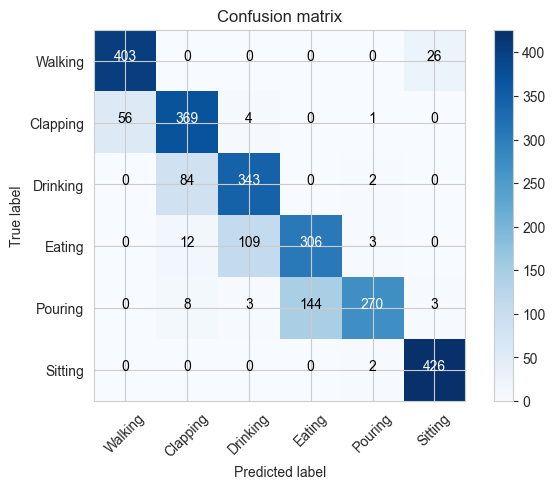

In [27]:

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=decoded_labels,normalize= False,  title='Confusion matrix')

In [28]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([459, 458, 459, 458, 457, 454]))